In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [6]:
data = df[['Date', 'Adj Close']]
data = data.reset_index()
data.head()

,index,Date,Adj Close
0,0,2022-01-03,180.959732
1,1,2022-01-04,178.663071
2,2,2022-01-05,173.910660
3,3,2022-01-06,171.007492
4,4,2022-01-07,171.176529


In [7]:
data = data.drop('index', axis=1)
data.set_index('Date', inplace=True)
df_interpol = data.asfreq('B')
df_interpol

,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529
...,...
2022-12-26,NaN
2022-12-27,130.029999
2022-12-28,126.040001


<AxesSubplot:xlabel='Date'>

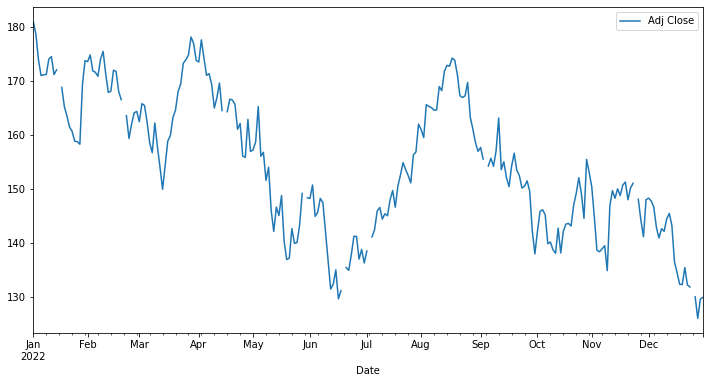

In [9]:
df_interpol.plot(figsize=(12,6))

In [16]:
df_interpol['Adj Close'] = data['Adj Close'].astype(float).interpolate(method='time')
df_interpol

,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529
...,...
2022-12-26,NaN
2022-12-27,130.029999
2022-12-28,126.040001


In [17]:
df_interpol.isna().sum()

Adj Close    9
dtype: int64

In [ ]:
from pycaret.time_series import *


In [ ]:
exp = setup(data=data, session_id=123)